In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [ ]:
data = load_iris()
print (data.feature_names)
print (data.target_names)
print (data.data.shape)
print (data.target.shape)

In [ ]:
X = data.data[:,2:4]
y = data.target  


In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Dataset')


In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.figure()
plt.scatter(X_std[:,0], X_std[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width(scaled)')
plt.title('Iris Dataset(scaled)')

In [ ]:
X_bias = np.c_[np.ones((X_std.shape[0], 1)), X_std]
X_bias[:5]

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_bias, y, test_size=0.2, random_state=0)

In [ ]:
def logistic_regression(X,y,lr=0.01, num_iter=10000):

    weights = []
    w = np.zeros(X.shape[1],np.max(y)+1)
    weights.append(w)
    for i in range(num_iter):
        z = np.dot(X,w)
        y_hat = softmax(z)
        w = w - lr*X.T.dot(y_hat-y)
        weights.append(w)
    return w,losses,weights

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=1)

In [ ]:
w , losses, weights = logistic_regression(x_train, y_train, lr=0.1, num_iter=1000)



## test

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


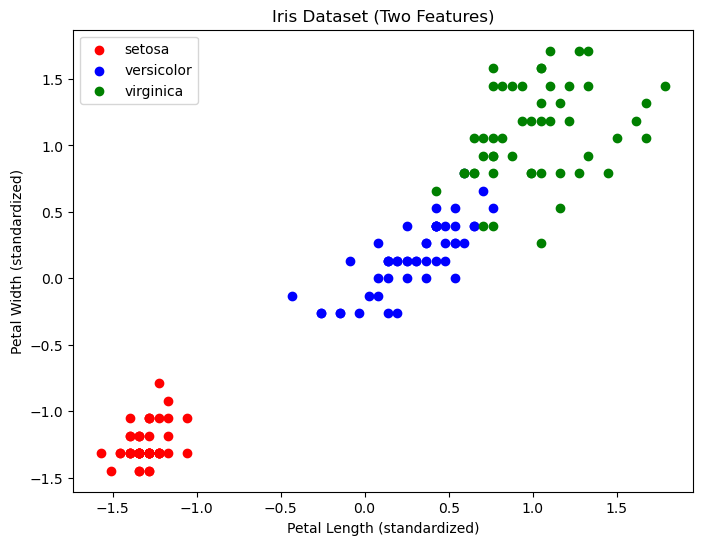

In [4]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target  # labels (0, 1, 2 for the three classes)

print("Feature Names:", data.feature_names)
print("Target Names:", data.target_names)

# Select two features: petal length and petal width
feature_indices = [2, 3]  # 0-based indexing
X = X[:, feature_indices]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a bias term (column of ones) to the feature matrix
X_bias = np.hstack((X_scaled, np.ones((X_scaled.shape[0], 1))))

# Plot the standardized data
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
labels = data.target_names

for i in range(len(colors)):
    plt.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], color=colors[i], label=labels[i])

plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.title('Iris Dataset (Two Features)')
plt.legend()
plt.show()


In [5]:
import pdb


In [6]:

def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def compute_loss(w, X, y):
    z = X @ w
    predictions = softmax(z)

    # converting labels to one-hot encoding
    y_onehot = np.zeros_like(predictions)
    y_onehot[np.arange(len(y)), y] = 1

    # cross-entropy loss
    epsilon = 1e-15  # to avoid log(0)
    loss = -np.mean(np.sum(y_onehot * np.log(predictions + epsilon), axis=1))
    return loss

def compute_gradient(w, X, y):
    z = X @ w
    predictions = softmax(z)

    # converting labels to one-hot encoding
    y_onehot = np.zeros_like(predictions)
    y_onehot[np.arange(len(y)), y] = 1

    # gradient itself
    errors = predictions - y_onehot
    gradient = X.T @ errors / len(y)
    return gradient

def gradient_descent_multiclass(X, y, learning_rate=0.1, n_steps=3, tolerance=1e-6):
    n_features = X.shape[1]
    n_classes = np.max(y) + 1  # labels are 0-indexed

    w = np.zeros((n_features, n_classes)) # start with all weights equal to zero
    loss_history = [compute_loss(w, X, y)]
    weights_history = [w.copy()]  # For plotting decision boundaries

    for step in range(1, n_steps + 1):
        grad = compute_gradient(w, X, y)
        w -= learning_rate * grad
        loss = compute_loss(w, X, y)
        loss_history.append(loss)

        # storing weights every 10 steps for visualization
        if step % 10 == 0:
            weights_history.append(w.copy())

        # check for convergence
        if np.abs(loss_history[-2] - loss_history[-1]) < tolerance:
            print(f'Converged at step {step}')
            break

    return w, loss_history, weights_history




In [ ]:
pdb.set_trace()
w, loss_history, weights_history = gradient_descent_multiclass(X_bias, y)


None
> /var/folders/hd/c7cd4bd530l8x34l7q7fw3_m0000gn/T/ipykernel_68617/1507785534.py(1)<module>()
----> 1 pdb.set_trace()
      2 w, loss_history, weights_history = gradient_descent_multiclass(X_bias, y)



--Return--
None
> /var/folders/hd/c7cd4bd530l8x34l7q7fw3_m0000gn/T/ipykernel_68617/1507785534.py(1)<module>()
----> 1 pdb.set_trace()
      2 w, loss_history, weights_history = gradient_descent_multiclass(X_bias, y)

Breakpoint 1 at /var/folders/hd/c7cd4bd530l8x34l7q7fw3_m0000gn/T/ipykernel_68617/1507785534.py:2
    [... skipped 1 hidden frame]

> /Users/mahsa/anaconda3/envs/ML/lib/python3.13/site-packages/IPython/core/interactiveshell.py(3582)run_code()
   3580             finally:
   3581                 # Reset our crash handler in place
-> 3582                 sys.excepthook = old_excepthook
   3583         except SystemExit as e:
   3584             if result is not None:



In [ ]:
#w, loss_history, weights_history = gradient_descent_multiclass(X_bias, y)

# visualize decision boundaries
def plot_decision_boundaries(X, y, w):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    X_grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0])]
    Z = np.argmax(softmax(X_grid @ w), axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Petal Length (standardized)')
    plt.ylabel('Petal Width (standardized)')
    plt.title('Decision Boundaries')
    plt.show()

# decision boundaries
plot_decision_boundaries(X_scaled, y, w)
